In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

%matplotlib inline

In [2]:
src_dir = 'rps-cv-images'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [3]:
print('paper : ',len(os.listdir(paper_dir)))
print('rock : ',len(os.listdir(rock_dir)))
print('scissors : ',len(os.listdir(scissors_dir)))

paper :  712
rock :  726
scissors :  750


In [4]:
generator = ImageDataGenerator(validation_split=0.4, rescale=1/255, shear_range=0.2, zoom_range=0.2, rotation_range=20, fill_mode='nearest')
train_data = generator.flow_from_directory(src_dir, batch_size=32, target_size=(150,150), subset='training')
val_data = generator.flow_from_directory(src_dir, batch_size=32,  target_size=(150,150), subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [10]:
# ((shape of width of filter*shape of height filter*number of filters in the previous layer+1)*number of filters) 
# = ((3 * 3 * 3) + 1 ) * 32

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [7]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callbacks = Callbacks()

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
historyModel = model.fit(
    train_data,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_data,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/20
25/25 - 48s - loss: 1.1506 - accuracy: 0.3525 - val_loss: 1.0806 - val_accuracy: 0.3000
Epoch 2/20
25/25 - 37s - loss: 0.9160 - accuracy: 0.5377 - val_loss: 0.7309 - val_accuracy: 0.6687
Epoch 3/20
25/25 - 33s - loss: 0.5986 - accuracy: 0.7844 - val_loss: 0.4816 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 32s - loss: 0.4393 - accuracy: 0.8487 - val_loss: 0.3860 - val_accuracy: 0.9187
Epoch 5/20
25/25 - 31s - loss: 0.2707 - accuracy: 0.9091 - val_loss: 0.2456 - val_accuracy: 0.9312

Reached 90.91% accuracy, training has been stop


Rock


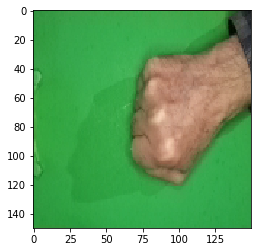

In [12]:
uploaded = os.path.join(rock_dir,'0NDYNEoDui7o64gU.png')
img = image.load_img(uploaded, target_size = (150, 150))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)  
if classes[0][0] == 1:
  print('Paper')
elif classes[0][1] == 1:
  print('Rock')
else:
  print('Scissors')